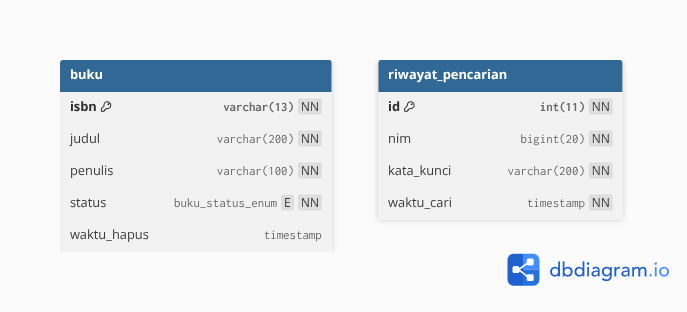

# Rekomendasi Service API Documentation

## Base URL
```
http://localhost:5005
```


## 1. POST `/rekomendasi`

### Description
Return book recommendations for a student based on their latest search keywords (from `riwayat_pencarian`).

If the student has no search history, the API returns a default list of the most recent available books.

### Request Body
```json
{
  "nim": "123456"
}
```

- `nim`: Student identifier (required)

### Success Response
Returns a JSON array (up to 5 records) containing books from the local `buku` table.

```json
[
  {
    "isbn": "9780000000001",
    "judul": "Sample Book",
    "penulis": "Author Name",
    "status": "tersedia",
    "waktu_hapus": null
  }
]
```

### Error Responses
- `400`: Returned when request JSON is missing or does not contain `nim`.
- `500`: Returned on database/query errors.


In [ ]:
import requests

payload = {
  "nim": "123456"
}

print(requests.post("http://localhost:5005/rekomendasi", json=payload).json())


## Redis Events

This service **subscribes** to Redis Pub/Sub channels to keep its local database in sync with other services.

| Event | Channel | Description |
|------|--------|-------------|
| `mahasiswa_updated` | `mahasiswa_events` | Receives mahasiswa updates (currently logged only) |
| `book_added` | `book_events` | Insert/update a book record into `buku` |
| `book_updated` | `book_events` | Update existing book fields (title/author) |
| `book_deleted` | `book_events` | Soft-delete a book by setting `waktu_hapus` |
| `book_status_updated` | `book_events` | Update availability status in `buku` |
| `book_searched` | `book_events` | Insert search keyword into `riwayat_pencarian` |


## Security Notes

- No authentication/authorization is implemented on `POST /rekomendasi` (any client can request recommendations).
- The service relies on trusted internal infrastructure (DB + Redis) for correctness.
- Consider adding rate limiting and request validation (e.g., strict JSON schema) for production.


## Architectural Notes

- Runs a background Redis subscriber thread to process events while the Flask app serves HTTP requests.
- Designed for an event-driven microservices setup where book/search data is synchronized through Redis.
- Recommendation logic is keyword-based (matching `judul`/`penulis`) and returns only available, non-deleted books.
